In [1]:
from qiskit import *

In [2]:
from qiskit import IBMQ

In [3]:
# create 2-qubit quantum register
qr = QuantumRegister(2)

In [4]:
# create 2-qubit classical q register
cr = ClassicalRegister(2)

In [5]:
# create circuit
circuit = QuantumCircuit(qr, cr)

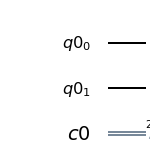

In [6]:
# draw the circuit
%matplotlib inline
circuit.draw()
# the quantum bits are Q zero sub zero and Q zero sub one
# the classic bits are c zero sub zero and c zero sub one

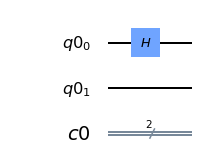

In [7]:
# using Hadamard gate on the first qubit
circuit.h(qr[0])
circuit.draw(output='mpl')

In [8]:
# controlled Not (CNOT) gate. if first qbit is 1 then second flips to one.
circuit.cx(qr[0], qr[1])

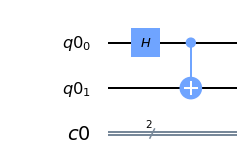

In [9]:
circuit.draw(output='mpl')
# Hadamard gate

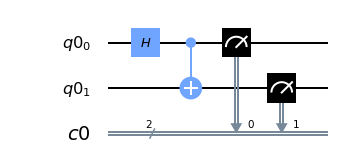

In [10]:
# now we measeur quantum bits and take those measurements and store them into classical bits
circuit.measure(qr,cr)
circuit.draw(output='mpl')

In [14]:
# run the circuit on laptop on the simulator 
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()

In [15]:
from qiskit.tools.visualization import plot_histogram

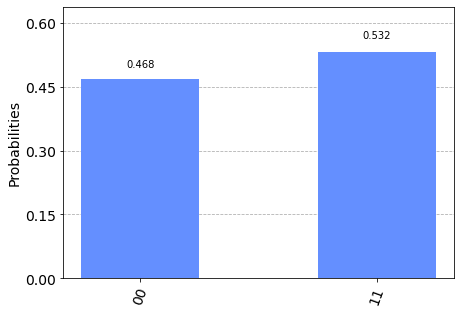

In [16]:
plot_histogram(result.get_counts(circuit))

In [17]:
IBMQ.load_account()

AuthenticationLicenseError: 'License required. You need to accept the License.'

In [15]:
provider = IBMQ.get_provider('ibm-q')

In [18]:
# the quantum computer which we are working with is ibmq_16_melbourne
# qcomp = provider.get_backend('ibmq_16_melbourne')
qcomp = provider.get_backend('ibmq_london')
# qcomp = provider.get_backend('ibmq_boeblingen')

In [21]:
# checking the status of your backend
qcomp.status().operational

True

In [19]:
# and we say that the job is our circuit executed on computer qcomp
job = execute(circuit, backend=qcomp)

In [23]:
from qiskit.tools.monitor import job_monitor

In [24]:
job_monitor(job)

Job Status: job has successfully run


In [25]:
result = job.result()

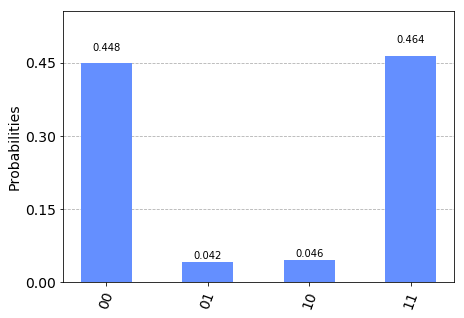

In [26]:
plot_histogram(result.get_counts(circuit))
# on the simulated case we had only 00 and 11
# on the q machine we have also small number of results showing 01 and 10 with majority of
# result on 00 and 11
# the reason: simulator is a perfect q device, q machine is real and it has 
# quantuum errors (those errors are shrinking as a result of technology improving)